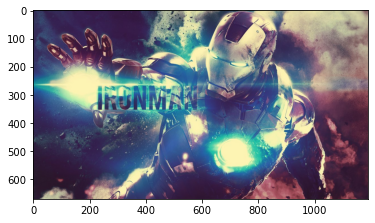

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

dirdata= "C:/Users/kp473/OneDrive/Documents/Deep Learning/Marvel"
categories =['iron_man','Hulk','captain_america','Thor']

for category in categories:
    path=os.path.join(dirdata,category)
    for img in os.listdir(path):
        img_array= cv2.imread(os.path.join(path,img))
        img_array= cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break      
    

In [2]:
print(img_array.shape)

(670, 1191, 3)


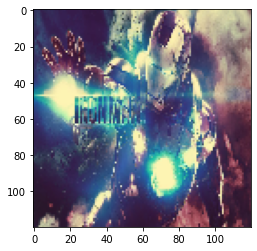

In [3]:
IMG_SIZE= 120

new_array= cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [4]:
training_data=[]
def create_training_data(): 
    for category in categories:
        path=os.path.join(dirdata,category)
        class_num= categories.index(category)
        for img in tqdm(os.listdir(path)):
            
            img_path= os.path.join(path,img)
            img_array= cv2.imread(img_path)
            try: 
                img_array= cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
                new_array= cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
                new_array= np.array( new_array, dtype=np.float32)
                
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
            
create_training_data()
print(len(training_data))

100%|████████████████████████████████████████████████████████████████████████████████| 417/417 [00:10<00:00, 40.27it/s]

1761


In [5]:
import random
random.shuffle(training_data)

In [6]:
for sample in training_data[:10]:
    print(sample[1])

0
1
0
0
1
0
0
3
3
1


In [7]:
X=[]
y=[]


In [8]:
for features,label in training_data:
    X.append(features)
    y.append(label)

X= np.array(X, np.float32) 
y=np.array(y)
    

In [9]:
X.shape[1:]

(120, 120, 3)

In [11]:
import pickle
pickle_out= open('X.pickle','wb')
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out_1=open('y.pickle','wb')
pickle.dump(y,pickle_out_1)
pickle_out_1.close()